In [182]:
import time
import random
import datetime
import matplotlib.pyplot as plt

In [183]:
def checkConflictsArray(array, return_list):
    import time
    # array is ArrayListEventStore to be searched for conflicts
    # return list is 1 to print a list of conflicts, 0 to skip printing (for large data sets)
    start_time = time.time() # start execution time

    # set variables to collect data
    checked = [] 
    conflicts = []
    conflict_id = []

    # zero counters
    con_instance = 0
    conflict_total = 0

    size = array.get_size()
    #print(f"array size = {size}")
    
    for j in range(size):
        #print(f"j = {j}")
        # Event parameters to check for conflicts
        chk_sked = (array.events[j]).getTimestamp() # timestamp
        chk_loc = (array.events[j]).getLocation() # location
        #print(f"chk_sked = {chk_sked}")
        #print(f"chk_loc = {chk_loc}")
        
        chk_combo = chk_loc + '_' + str(chk_sked) # date / time / location combined

        # check if date / time / location combination has been checked for conflicts already
        # if so, skip to next combination
        if(chk_combo in checked):
            #print(f"{chk_combo} already checked")
            continue
        # if date / time / location combination has not been checked for conflicts, continue
        else:
            checked.append(chk_combo) # note combination being checked 
            #print(f"checking {chk_combo}")

            conflict_count = 0 # zero conflict count

            # comparison starts with next event after event being checked
            for k in range(j+1,size):
                #print(k)
                # if match of timestamp and location
                #print(f"Timestamp compare: {(array.events[k]).getTimestamp()} vs {chk_sked}")
                #print(f"Location compare: {(array.events[k]).getLocation()} vx {chk_loc}")
                if((array.events[k]).getTimestamp() == chk_sked and (array.events[k]).getLocation() == chk_loc):
                    conflict_count +=1
                    # if first conflict instance, note both event ids
                    if(conflict_count == 1):
                        conflict_id.append((array.events[j]).getId())
                        conflict_id.append((array.events[k]).getId())
                    # if subsequent conflict instance, note only new event id
                    else:
                        conflict_id.append((array.events[k]).getId())
                    #print(f"conflict identified - count {conflict_count}")
            # if reach the end of the search and conflicts have been identified
            # document conflict counts and details
            if(k == (size-1)) and conflict_count > 0: 
                conflicts.append([chk_combo, conflict_count])
                con_instance += 1
                conflict_total += conflict_count
    end_time = time.time() # stop execution time
    conflict_chk_time = end_time - start_time # calculate run time

    print(f"{conflict_total} conflicts identified for {con_instance} time / loc combinations")

    #print(f"Conflict List: {conflicts}")

    print(f"Conflict checking time: {conflict_chk_time} s")
    if(return_list == 1):
        return conflict_total, con_instance, conflict_chk_time, conflict_id
    else:
        return conflict_total, con_instance, conflict_chk_time      


In [184]:
class Event():
    def __init__(self, id:int, title:str = None, date:str = "", time:str = "", location:str = ""):
        
        #self.date, self.time, self.timestamp, self.location = gen_event_details() #return date, time_start, timestamp, location
        
        self.id = id
        self.title = str(id) if title is None else title
        self.date = date
        self.time = time
        self.location = location #random.choice(loc)
        self.timestamp = self.make_timestamp()

    def make_timestamp(self):
        if not self.date or not self.time:
            return None
        d = self.date.replace("-", "")
        t = self.time.replace(":", "")
        return int(d+t)

    def getId(self):
        return self.id
    
    def getTitle(self):
        return self.title
    
    def getDate(self):
        return self.date
    
    def getTime(self):
        return self.time

    def getTimestamp(self):
        return self.timestamp
    
    def getLocation(self):
        return self.location

    def setDate(self, date:str):
        self.date = date

    def setTime(self, time:str):
        self.time = time
    
    def setLocation(self, location:str):
        self.location = location
        
    def __str__(self):
        return f"Event(ID: {self.id}, Title: {self.title}, Date: {self.date}, Time: {self.time}, Timestamp: {self.timestamp}, Location: {self.location})"


In [185]:
from abc import ABC, abstractmethod

class EventStore(ABC):
    
    @abstractmethod
    def insert_event(self, event):
        pass

    @abstractmethod
    def delete_event(self, event_id:int):
        pass

    @abstractmethod
    def search_by_id(self, event_id:int):
        pass

    @abstractmethod
    def list_all_events(self):
        pass

In [186]:
#from EventStore import EventStore
#import Event

class ArrayListEventStore(EventStore):

    def __init__(self, size:int):
        self.events = []
        self.size = size

    def get_size(self):
        return self.size
    
    def insert_event(self, event):
        if len(self.events) < self.size:
            self.events.append(event)


    def delete_event(self, event_id):
        for event in self.events:
            if event.getId() == event_id:
                self.events.remove(event)
                return True
        return False  
    
    def search_by_id(self, event_id:int):
        for event in self.events:
            if event.getId() == event_id:
                return event
        return None
    
    def list_all_events(self):
        return self.events
    

In [187]:
def test_event_fixed_array(x):
    import random
    EventList = ArrayListEventStore(x)
    for i in range(x): 
        if (i//2 !=0 and i < 4):
            eventi = Event(i+1, f"Event {i+1}", "2026-01-01", "10:00", "Conf Rm 42")
        else:
            s = random.randint(1,x)
            if(s//2 == 0 and s>5):
                eventi = Event(i+1, f"Event {i+1}", "2026-07-13", "15:00", "Bldg 2")
            elif(s == 5): 
                eventi = Event(i+1, f"Event {i+1}", "2026-04-19", "18:00", "Bldg 2")
            elif(s//3 ==0): 
                eventi = Event(i+1, f"Event {i+1}", "2026-12-06", "06:00", "Bldg 1")
            else:
                eventi = Event(i+1, f"Event {i+1}", "2026-12-06", "10:00", "Bldg 2")
        print(f"Event generated {eventi}")
        EventList.insert_event(eventi)
        
    return EventList    

In [188]:
test_known_10 = test_event_fixed_array(10)

Event generated Event(ID: 1, Title: Event 1, Date: 2026-04-19, Time: 18:00, Timestamp: 202604191800, Location: Bldg 2)
Event generated Event(ID: 2, Title: Event 2, Date: 2026-12-06, Time: 10:00, Timestamp: 202612061000, Location: Bldg 2)
Event generated Event(ID: 3, Title: Event 3, Date: 2026-01-01, Time: 10:00, Timestamp: 202601011000, Location: Conf Rm 42)
Event generated Event(ID: 4, Title: Event 4, Date: 2026-01-01, Time: 10:00, Timestamp: 202601011000, Location: Conf Rm 42)
Event generated Event(ID: 5, Title: Event 5, Date: 2026-12-06, Time: 06:00, Timestamp: 202612060600, Location: Bldg 1)
Event generated Event(ID: 6, Title: Event 6, Date: 2026-12-06, Time: 10:00, Timestamp: 202612061000, Location: Bldg 2)
Event generated Event(ID: 7, Title: Event 7, Date: 2026-12-06, Time: 10:00, Timestamp: 202612061000, Location: Bldg 2)
Event generated Event(ID: 8, Title: Event 8, Date: 2026-12-06, Time: 10:00, Timestamp: 202612061000, Location: Bldg 2)
Event generated Event(ID: 9, Title: Even

In [189]:
print("Array List Conflict Check Results: Event Set with Known Conflicts")
conflict_total0, con_instances0, conflict_chk_time0, conflict_id_list0 = checkConflictsArray(test_known_10, 1)
print(f"\nTotal conflicts identified: {conflict_total0}")
print(f"Number of date/time/location combinations with conflicts: {con_instances0}")
print(f"Time to run conflict checks: {conflict_chk_time0} s")
print(f"Event IDs of events with conflicts: {conflict_id_list0}\n")

for i in range(len(conflict_id_list0)):
    print(test_known_10.search_by_id(conflict_id_list0[i]))

Array List Conflict Check Results: Event Set with Known Conflicts
6 conflicts identified for 2 time / loc combinations
Conflict checking time: 4.2438507080078125e-05 s

Total conflicts identified: 6
Number of date/time/location combinations with conflicts: 2
Time to run conflict checks: 4.2438507080078125e-05 s
Event IDs of events with conflicts: [2, 6, 7, 8, 9, 10, 3, 4]

Event(ID: 2, Title: Event 2, Date: 2026-12-06, Time: 10:00, Timestamp: 202612061000, Location: Bldg 2)
Event(ID: 6, Title: Event 6, Date: 2026-12-06, Time: 10:00, Timestamp: 202612061000, Location: Bldg 2)
Event(ID: 7, Title: Event 7, Date: 2026-12-06, Time: 10:00, Timestamp: 202612061000, Location: Bldg 2)
Event(ID: 8, Title: Event 8, Date: 2026-12-06, Time: 10:00, Timestamp: 202612061000, Location: Bldg 2)
Event(ID: 9, Title: Event 9, Date: 2026-12-06, Time: 10:00, Timestamp: 202612061000, Location: Bldg 2)
Event(ID: 10, Title: Event 10, Date: 2026-12-06, Time: 10:00, Timestamp: 202612061000, Location: Bldg 2)
Even

In [190]:
class Event_Random():
    def __init__(self, id:int):#, title:str = None, date:str = "", time:str = "", location:str = ""):
        
        self.date, self.time, self.timestamp, self.location = gen_event_details() #return date, time_start, timestamp, location
        
        self.id = id
        self.title = str(id) #if title is None else title
        #self.date = date
        #self.time = time
        #self.location = random.choice(loc)
        #$self.timestamp = 

    def getId(self):
        return self.id
    
    def getTitle(self):
        return self.title
    
    def getDate(self):
        return self.date
    
    def getTime(self):
        return self.time

    def getTimestamp(self):
        return self.timestamp
    
    def getLocation(self):
        return self.location

    def setDate(self, date:str):
        self.date = date

    def setTime(self, time:str):
        self.time = time
    
    def setLocation(self, location:str):
        self.location = location
        
    def __str__(self):
        return f"Event(ID: {self.id}, Title: {self.title}, Date: {self.date}, Time: {self.time}, Timestamp: {self.timestamp}, Location: {self.location})"


In [191]:
def gen_event_details():
    import datetime
    import random
    
    # Parameters for random generation of dates, times, and locations
    year = [2026]
    day = [31,28,31,30,31,30,31,31,30,31,30,31]
    hour = range(1,24)
    minute = [0]
    loc = ["Bldg 1", "Bldg 2", "Bldg 6", "Conf Rm 13", "Conf Rm 42", "Parking Lot 3"]

    # Generate date
    y = random.choice(year)
    
    mon = random.randint(1,12)
    if(mon<10):
        m = '0'+str(mon) 
    else: m = str(mon)
         
    D = day[mon-1]
    dy = random.randint(1,D)
    if(dy<10):
        d = '0'+str(dy) 
    else: d = str(dy)

    # Generate time
    h = random.randint(1,23)
    if(h<10): 
        hh = '0' + str(h) 
    else: hh = str(h)
        
    mi = 0
    mm = '00' 
    
    # Date 
    date = str(y)+'-'+ m +'-'+ d
    
    # Start time
    time_start =  hh + ':' + mm

    # Location
    location = random.choice(loc)

    # Generate datetime & timestamp
    dt = datetime.datetime(y,mon,dy,h,mi)
    timestamp = dt.timestamp()

    return date, time_start, timestamp, location

In [192]:
def test_event_random_array(x):
    EventList = ArrayListEventStore(x)
    for i in range(x):           
        eventi = Event_Random(i+1)#, f"Event {i}", date, time_start, location)
        if(x<15):print(f"Event generated {eventi}")
        EventList.insert_event(eventi)
        
    return EventList    


In [193]:
test_random_10 = test_event_random_array(10)

Event generated Event(ID: 1, Title: 1, Date: 2026-07-14, Time: 22:00, Timestamp: 1784088000.0, Location: Conf Rm 42)
Event generated Event(ID: 2, Title: 2, Date: 2026-10-07, Time: 19:00, Timestamp: 1791421200.0, Location: Bldg 2)
Event generated Event(ID: 3, Title: 3, Date: 2026-04-30, Time: 07:00, Timestamp: 1777554000.0, Location: Bldg 2)
Event generated Event(ID: 4, Title: 4, Date: 2026-02-04, Time: 07:00, Timestamp: 1770213600.0, Location: Conf Rm 42)
Event generated Event(ID: 5, Title: 5, Date: 2026-12-06, Time: 12:00, Timestamp: 1796583600.0, Location: Bldg 1)
Event generated Event(ID: 6, Title: 6, Date: 2026-05-11, Time: 17:00, Timestamp: 1778540400.0, Location: Bldg 6)
Event generated Event(ID: 7, Title: 7, Date: 2026-04-01, Time: 18:00, Timestamp: 1775088000.0, Location: Bldg 6)
Event generated Event(ID: 8, Title: 8, Date: 2026-10-28, Time: 18:00, Timestamp: 1793232000.0, Location: Conf Rm 42)
Event generated Event(ID: 9, Title: 9, Date: 2026-02-16, Time: 19:00, Timestamp: 177

In [194]:
print("Array List Conflict Check Results: Random Event Set with 10 Events")
conflict_total1, con_instances1, conflict_chk_time1, conflict_id_list1 = checkConflictsArray(test_random_10, 1)
print(f"\nTotal conflicts identified: {conflict_total1}")
print(f"Number of date/time/location combinations with conflicts: {con_instances1}")
print(f"Time to run conflict checks: {conflict_chk_time1} s")
print(f"Event IDs of events with conflicts: {conflict_id_list1}")

for i in range(len(conflict_id_list1)):
    print(test_random_10.search_by_id(conflict_id_list1[i]))

Array List Conflict Check Results: Random Event Set with 10 Events
0 conflicts identified for 0 time / loc combinations
Conflict checking time: 3.9577484130859375e-05 s

Total conflicts identified: 0
Number of date/time/location combinations with conflicts: 0
Time to run conflict checks: 3.9577484130859375e-05 s
Event IDs of events with conflicts: []


In [195]:
print("Array List Conflict Check Results: Random Event Set with 500 Events")
test_random_500 = test_event_random_array(500)
conflict_total2, con_instances2, conflict_chk_time2, conflict_id_list2 = checkConflictsArray(test_random_500, 1)
print(f"\nTotal conflicts identified: {conflict_total2}")
print(f"Number of date/time/location combinations with conflicts: {con_instances2}")
print(f"Time to run conflict checks: {conflict_chk_time2} s")
print(f"Event IDs of events with conflicts: {conflict_id_list2}\n")

for i in range(len(conflict_id_list2)):
    print(test_random_500.search_by_id(conflict_id_list2[i]))

Array List Conflict Check Results: Random Event Set with 500 Events
2 conflicts identified for 2 time / loc combinations
Conflict checking time: 0.011670827865600586 s

Total conflicts identified: 2
Number of date/time/location combinations with conflicts: 2
Time to run conflict checks: 0.011670827865600586 s
Event IDs of events with conflicts: [27, 386, 185, 226]

Event(ID: 27, Title: 27, Date: 2026-03-30, Time: 20:00, Timestamp: 1774922400.0, Location: Conf Rm 42)
Event(ID: 386, Title: 386, Date: 2026-03-30, Time: 20:00, Timestamp: 1774922400.0, Location: Conf Rm 42)
Event(ID: 185, Title: 185, Date: 2026-06-08, Time: 23:00, Timestamp: 1780981200.0, Location: Conf Rm 42)
Event(ID: 226, Title: 226, Date: 2026-06-08, Time: 23:00, Timestamp: 1780981200.0, Location: Conf Rm 42)


checking 50 events
0 conflicts identified for 0 time / loc combinations
Conflict checking time: 0.0002753734588623047 s
checking 500 events
0 conflicts identified for 0 time / loc combinations
Conflict checking time: 0.01068735122680664 s
checking 1000 events
16 conflicts identified for 15 time / loc combinations
Conflict checking time: 0.04217529296875 s
checking 5000 events
254 conflicts identified for 242 time / loc combinations
Conflict checking time: 1.019348382949829 s
checking 10000 events
962 conflicts identified for 895 time / loc combinations
Conflict checking time: 4.068916320800781 s
checking 25000 events
5225 conflicts identified for 4455 time / loc combinations
Conflict checking time: 23.454206943511963 s
checking 50000 events
18380 conflicts identified for 13268 time / loc combinations
Conflict checking time: 77.76222276687622 s
Array List Conflict Check Results: Multiple Event Sets Randomly Generated
Total conflicts identifed: [0, 0, 16, 254, 962, 5225, 18380])
Conflict

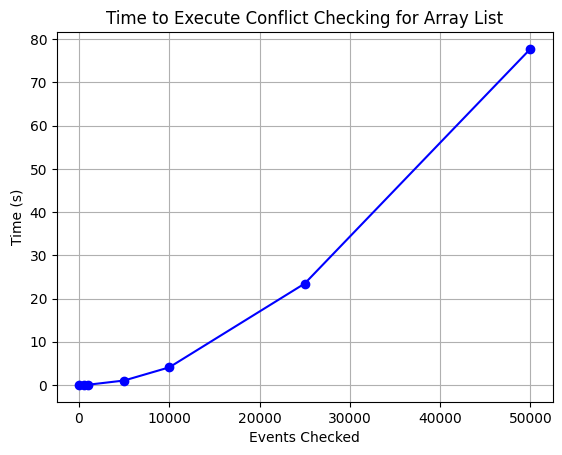

In [196]:
# Generate test arrays of variable sizes
test_inc = (50,500,1000,5000,10000,25000,50000)
ind = 0

n = len(test_inc)

conflict_count_tot = [0] * n
con_instances = [0] * n
conflict_chk_time = [0] * n
conflict_id_list = [0] * n

for m in range(n):
    z = test_inc[m]
    print(f"checking {z} events")
    #print(m)

    test_set = test_event_random_array(z)
    
    conflict_count_tot[m], con_instances[m], conflict_chk_time[m] = checkConflictsArray(test_set, 0)
    

print("Array List Conflict Check Results: Multiple Event Sets Randomly Generated")
print(f"Total conflicts identifed: {conflict_count_tot})")
print(f"Conflict instances: {con_instances}")
print(f"Time to check conflicts: {conflict_chk_time}")


import matplotlib.pyplot as plt

plt.plot(test_inc, conflict_chk_time, marker='o', linestyle='-', color='blue', label='?')
plt.xlabel("Events Checked")
plt.ylabel("Time (s)")
plt.title("Time to Execute Conflict Checking for Array List")
plt.grid(True)
plt.show()
